In [1]:
from datasets import load_titanic, balance_classes
from tools import model_performance, confusion_matrix
from sklearn.metrics import plot_roc_curve
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import plotly.express as px

In [2]:
df, df_train, df_test = load_titanic()
df_train.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'target'], dtype='object')

In [3]:
original_X = df.drop(['target'], axis=1)
original_y = df['target']
train_X = df_train.drop(['target'], axis=1)
train_y = df_train['target']
test_X = df_test.drop(['target'], axis=1)
test_y = df_test['target']

In [4]:
original_X = pd.get_dummies(original_X)
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)

features = train_X.columns

In [5]:
scaler = StandardScaler().fit(train_X)
original_X = scaler.transform(original_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [6]:
# 5-fold split (stratified)
k = []
scores = []
for i in range(1, 60):
    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, original_X, original_y)
    scores.append(score.mean())
    k.append(i)

result = pd.DataFrame(zip(k, scores), columns=['k', 'accuracy (mean)'])
px.line(result, x='k', y='accuracy (mean)')

In [15]:
model = KNeighborsClassifier(n_neighbors=12)
model = model.fit(train_X, train_y)

In [16]:
model_performance(model, train_X, train_y, test_X, test_y)

Train score
0.7752808988764045
Test score
0.8022440392706872


In [17]:
confusion_matrix(model.predict(train_X), train_y, model.predict(test_X), test_y)

Train
TN: 98, TP: 40, FN: 28, FP: 12
Test
TN: 400, TP: 172, FN: 102, FP: 39


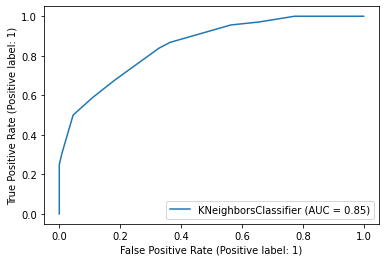

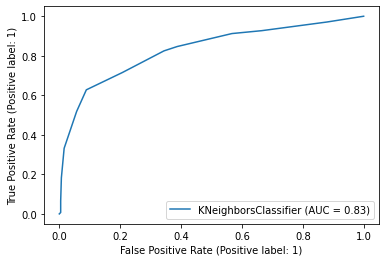

In [18]:
plot_roc_curve(model, train_X, train_y)
plot_roc_curve(model, test_X, test_y)